In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
# Set Up the image size
IMAGE_SIZE=[224,224]

train_path="/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Train"
test_path="/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Test"

In [5]:
# Import the vgg19 library as shown below and preprocessing the front end of VGG

vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [6]:
# Don't train existing layer
for layer in vgg.layers:
  layer.trainable=True

In [8]:
# Useful For Getting the no of output
folders=glob("/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Train/*")
folders

['/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Train/Uninfected',
 '/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Train/Parasite']

In [9]:
# our layer
x=Flatten()(vgg.output)

In [10]:
prediction= Dense(len(folders),activation='softmax')(x)

In [11]:
# Creating the model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
# Create Your own model
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# tell the model what loss and optimizer used
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Use image datagenerator to import the image from dataset
train_datagen = ImageDataGenerator (rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator (rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 419 images belonging to 2 classes.


In [17]:
testing_set =test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 134 images belonging to 2 classes.


In [18]:
# Fit the model and run
r=model.fit_generator(training_set, validation_data=testing_set, validation_steps=len(testing_set), steps_per_epoch=len(training_set), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
14/14 [==============================] - 126s 9s/step - loss: 1.4937 - accuracy: 0.5346 - val_loss: 0.6601 - val_accuracy: 0.6493
Epoch 2/50
14/14 [==============================] - 5s 334ms/step - loss: 0.6924 - accuracy: 0.5251 - val_loss: 0.6788 - val_accuracy: 0.6194
Epoch 3/50
14/14 [==============================] - 5s 337ms/step - loss: 0.6722 - accuracy: 0.5489 - val_loss: 0.6673 - val_accuracy: 0.6642
Epoch 4/50
14/14 [==============================] - 5s 337ms/step - loss: 0.6140 - accuracy: 0.6969 - val_loss: 0.7229 - val_accuracy: 0.4776
Epoch 5/50
14/14 [==============================] - 5s 333ms/step - loss: 0.5299 - accuracy: 0.7088 - val_loss: 0.7904 - val_accuracy: 0.4478
Epoch 6/50
14/14 [==============================] - 5s 332ms/step - loss: 0.6522 - accuracy: 0.6539 - val_loss: 0.9956 - val_accuracy: 0.3806
Epoch 7/50
14/14 [==============================] - 5s 335ms/step - loss:

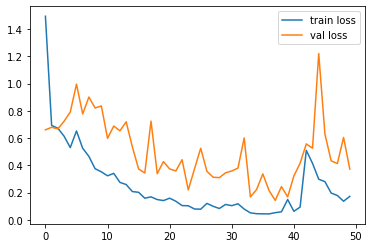

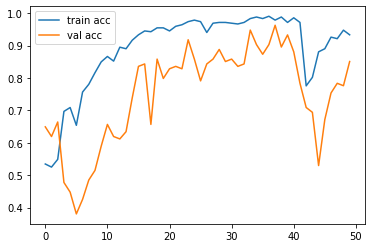

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Malaria Prediction/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Malaria Prediction/AccVal_acc')

In [20]:
# Save the model
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/Colab Notebooks/Malaria Prediction/model_vgg19.h5')

In [21]:
prediction=model.predict(testing_set)
prediction

array([[2.43682101e-01, 7.56317914e-01],
       [1.86238810e-01, 8.13761234e-01],
       [9.96745467e-01, 3.25452629e-03],
       [9.97385085e-01, 2.61487882e-03],
       [9.53097999e-01, 4.69020270e-02],
       [9.99997377e-01, 2.66251163e-06],
       [8.96755904e-02, 9.10324454e-01],
       [3.22863787e-01, 6.77136242e-01],
       [1.28779873e-01, 8.71220112e-01],
       [1.00000000e+00, 1.24080328e-08],
       [2.06658598e-02, 9.79334116e-01],
       [2.96445191e-02, 9.70355511e-01],
       [3.85944583e-02, 9.61405575e-01],
       [9.99951363e-01, 4.86496829e-05],
       [4.16873097e-02, 9.58312631e-01],
       [9.97955322e-01, 2.04461045e-03],
       [2.73260530e-02, 9.72674012e-01],
       [9.99999642e-01, 3.68566816e-07],
       [6.36799216e-01, 3.63200754e-01],
       [2.24711020e-02, 9.77528930e-01],
       [9.99911785e-01, 8.82590684e-05],
       [9.99999762e-01, 2.78911784e-07],
       [9.99958515e-01, 4.14385613e-05],
       [9.99975801e-01, 2.41969428e-05],
       [7.066521

In [22]:
predictions=np.argmax(prediction,axis=1)
predictions

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1])

In [23]:
# Now load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Malaria Prediction/model_vgg19.h5')

In [24]:
img = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/Malaria Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png',
                     target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data),axis=1)

In [31]:
if a==1:
  print('Uninfected')
else:
  print('Infected')

Infected
